In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandasql as psql

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-black-money-transactions-dataset/Big_Black_Money_Dataset.csv


In [2]:
blkmon_df = pd.read_csv('/kaggle/input/global-black-money-transactions-dataset/Big_Black_Money_Dataset.csv')
blkmon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

# SQL exploration 

In [3]:
query = """
SELECT * FROM blkmon_df
LIMIT 100;"""

# Execute the query using pandasql
result = psql.sqldf(query, locals())
result


,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,1,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,0,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,1,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,0,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,1,Illegal,1,9,Bank_57,Luxembourg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TX0000000096,USA,1.890855e+06,Cash Withdrawal,2013-01-04 23:00:00,Person_5611,Real Estate,Switzerland,0,Illegal,6,5,Bank_272,Panama
96,TX0000000097,Russia,2.212451e+06,Cryptocurrency,2013-01-05 00:00:00,Person_4479,Luxury Goods,Switzerland,0,Illegal,10,0,Bank_395,Cayman Islands
97,TX0000000098,Switzerland,2.647815e+06,Stocks Transfer,2013-01-05 01:00:00,Person_4435,Construction,India,0,Legal,4,3,Bank_439,Switzerland
98,TX0000000099,China,3.892984e+06,Offshore Transfer,2013-01-05 02:00:00,Person_3189,Finance,India,1,Illegal,4,3,Bank_493,Cayman Islands


In [4]:
query = """
SELECT 
    AVG("Amount (USD)") AS Avg_Amount,
    MAX("Amount (USD)") AS Max_Amount,
    MIN("Amount (USD)") AS Min_Amount,
    AVG("Money Laundering Risk Score") AS Avg_Risk_Score,
    MAX("Money Laundering Risk Score") AS Max_Risk_Score,
    MIN("Money Laundering Risk Score") AS Min_Risk_Score
FROM blkmon_df;
"""

# Execute the query using pandasql
result = psql.sqldf(query, locals())
result



,Avg_Amount,Max_Amount,Min_Amount,Avg_Risk_Score,Max_Risk_Score,Min_Risk_Score
0,2.501818e+06,4.999812e+06,10031.79673,5.5264,10,1


1. **Avg Transaction Amount**: $2.5M  
   - Indicates high-value transactions involving large financial operations.
   
2. **Max Transaction Amount**: $5M  
   - Highlights significant transaction sizes in the dataset.

3. **Min Transaction Amount**: $10K  
   - All transactions are substantial in value.

4. **Avg Risk Score**: 5.53  
   - Most transactions pose moderate to high risk.

5. **Max Risk Score**: 10  
   - Some transactions are flagged as very high-risk.

6. **Min Risk Score**: 1  
   - A few transactions are low-risk.

In [5]:
query = """
SELECT Country, COUNT(*) AS Total_Transactions
FROM blkmon_df
GROUP BY Country
ORDER BY Total_Transactions DESC;

"""

# Execute the query using pandasql
result = psql.sqldf(query, locals())
result


,Country,Total_Transactions
0,China,1038
1,South Africa,1026
2,UK,1014
3,Brazil,1006
4,Russia,997
5,Singapore,995
6,India,990
7,Switzerland,985
8,UAE,976
9,USA,973


* China has highest black money transactions then South Africa  and followed bu UK, these values indicate that these are major hubs for financial activities
* UK and Brazil also show high transaction volumes, suggesting significant financial movement in these countries.
* Russia and Singapore closely follow, possibly pointing to involvement in large-scale international transactions.
* India and Switzerland highlight their role in global financial flows, with Switzerland possibly indicating tax haven activities.
* UAE and USA show substantial transaction counts, emphasizing the importance of these financial markets in the dataset.

In [6]:
query = """
SELECT 
    "Shell Companies Involved", 
    "Tax Haven Country", 
    "Destination Country",
    "Country",
    "Financial Institution",
    COUNT(*) AS Total_Transactions 
FROM blkmon_df
GROUP BY "Shell Companies Involved", "Tax Haven Country", "Destination Country", "Country", "Financial Institution"
ORDER BY Total_Transactions DESC;
"""

# Execute the query using pandasql
result = psql.sqldf(query, locals())
result


,Shell Companies Involved,Tax Haven Country,Destination Country,Country,Financial Institution,Total_Transactions
0,1,Luxembourg,USA,South Africa,Bank_485,2
1,1,Panama,USA,Switzerland,Bank_439,2
2,1,Singapore,USA,South Africa,Bank_42,2
3,1,Switzerland,UK,Singapore,Bank_197,2
4,2,Bahamas,UAE,USA,Bank_185,2
...,...,...,...,...,...,...
9975,9,Switzerland,USA,Switzerland,Bank_71,1
9976,9,Switzerland,USA,UAE,Bank_92,1
9977,9,Switzerland,USA,UK,Bank_24,1
9978,9,Switzerland,USA,UK,Bank_277,1


* Shell Companies Involvement: Shell companies involved range from 1 to 9. The highest number of shell companies (9) frequently appear in transactions linked to Switzerland as a tax haven country. This is due to Switzerland's financial policies. The presence of multiple shell companies (up to 9) strongly indicates efforts to obscure ownership and the source of funds, which is typical in money laundering schemes.

* Tax Haven Countries: Luxembourg, Panama, Singapore, Switzerland, and the Bahamas are the primary tax haven countries in these transactions, with Switzerland having a higher frequency than other countries.

* Destination and Origin Countries: Most transactions are destined for the USA, but they originate from a variety of countries, including South Africa, Singapore, Switzerland, and the United Arab Emirates. Transactions going from these countries to tax havens and then to developed financial markets like the USA seem to be an attempt to legitimize funds by moving them through several different jurisdictions.

* Financial Institutions Involved: Various banks across different countries are involved in these transactions. These financial institutions play a key role in facilitating the movement of funds.

* Transaction Frequency: Shell companies and tax havens are commonly involved in these transactions, many of which involve several layers of shell companies. This suspicious nature is further highlighted by the fact that these transactions frequently target well-known destinations such as the USA and involve financial institutions located in tax havens.

In [7]:
query = """
SELECT "Transaction ID", Country, "Amount (USD)", "Transaction Type","Industry", "Source of Money"
FROM blkmon_df
ORDER BY "Amount (USD)" DESC
LIMIT 10;
"""

# Execute the query using pandasql
result = psql.sqldf(query, locals())
result


,Transaction ID,Country,Amount (USD),Transaction Type,Industry,Source of Money
0,TX0000005487,India,4.999812e+06,Cash Withdrawal,Casinos,Legal
1,TX0000006834,UK,4.999461e+06,Stocks Transfer,Oil & Gas,Illegal
2,TX0000006382,UAE,4.999336e+06,Cash Withdrawal,Casinos,Illegal
3,TX0000009451,Singapore,4.999327e+06,Offshore Transfer,Real Estate,Illegal
4,TX0000007899,UAE,4.999308e+06,Cash Withdrawal,Construction,Illegal
5,TX0000006903,Switzerland,4.999308e+06,Property Purchase,Arms Trade,Illegal
6,TX0000009677,China,4.999031e+06,Offshore Transfer,Casinos,Legal
7,TX0000009563,India,4.998505e+06,Offshore Transfer,Construction,Illegal
8,TX0000006324,China,4.997300e+06,Stocks Transfer,Finance,Legal
9,TX0000007477,Singapore,4.996989e+06,Cryptocurrency,Casinos,Legal


* Countries Involved: The countries with the largest transactions include India, UK, UAE, Singapore, Switzerland, and China. Notably, the UAE and China appear multiple times, indicating their recurring involvement in high-value transactions. These countries may be key players in large-scale financial flows, both legitimate and suspicious.

* Transaction Types: The top transaction types are Cash Withdrawals and Offshore Transfers, which are often associated with money laundering and efforts to obscure the source of funds. Additional transaction types include Stocks Transfers, Property Purchases, and Cryptocurrency, showing the variety of methods used to move large sums of money.

* Industries Involved: High-risk industries such as Casinos, Construction, Real Estate, Arms Trade, Oil & Gas, and Finance dominate the largest transactions. Casinos feature prominently, with multiple entries in the top 10, as they are often targeted for laundering money due to their reliance on cash transactions. Construction and Real Estate are also common avenues for moving large amounts of illicit funds.

* Source of Money: The top 10 transactions are a mix of legal and illegal sources of money. Illegal sources dominate, especially in risky industries like Oil & Gas, Casinos, and Arms Trade. Legal sources are more frequently linked to Finance and Casinos, suggesting that even legitimate industries are used to channel large sums of money.

In [8]:
query = """
SELECT 
    "Money Laundering Risk Score",
    CASE 
        WHEN "Money Laundering Risk Score" <= 3 THEN 'Low Risk'
        WHEN "Money Laundering Risk Score" > 3 AND "Money Laundering Risk Score" <= 7 THEN 'Moderate Risk'
        ELSE 'High Risk'
    END AS Risk_Category,
    "Source of Money" AS Legality,
    "Industry",
    COUNT(*) AS Transaction_Count
FROM blkmon_df
GROUP BY "Money Laundering Risk Score", Risk_Category, Legality, Industry
ORDER BY Risk_Category DESC, Transaction_Count DESC;
"""

# Execute the query using pandasql
result = psql.sqldf(query, locals())
result


,Money Laundering Risk Score,Risk_Category,Legality,Industry,Transaction_Count
0,7,Moderate Risk,Illegal,Arms Trade,130
1,4,Moderate Risk,Illegal,Luxury Goods,115
2,7,Moderate Risk,Illegal,Luxury Goods,115
3,4,Moderate Risk,Illegal,Casinos,112
4,4,Moderate Risk,Illegal,Oil & Gas,109
...,...,...,...,...,...
135,8,High Risk,Legal,Luxury Goods,34
136,8,High Risk,Legal,Arms Trade,33
137,9,High Risk,Legal,Casinos,33
138,8,High Risk,Legal,Oil & Gas,32


Moderate Risk Transactions:

    Arms Trade: With 130 illegal transactions, the arms trade industry shows significant involvement in moderate-risk activities, likely due to its association with illicit activities.
    Luxury Goods: 115 illegal transactions across multiple entries highlight that luxury goods are frequently used for laundering money, likely due to the high value and portability of the products.
    Casinos: 112 illegal transactions indicate that the casino industry is a common avenue for obscuring the source of funds, given the high cash flow nature of the business.
    Oil & Gas: With 109 illegal transactions, this industry highlights its vulnerability to being exploited for laundering money, possibly due to the large sums involved in the energy sector.

High Risk Transactions:

    Luxury Goods: 34 legal high-risk transactions show that even legitimate funds in this industry are under scrutiny, likely due to the frequent use of this sector for money laundering.
    Arms Trade: 33 legal high-risk transactions suggest that even legal transactions in the arms trade raise concerns, potentially due to regulatory or geopolitical risks.
    Casinos: With 33 legal high-risk transactions, casinos continue to appear in the high-risk category, showing that even legitimate funds may raise red flags.
    Oil & Gas: This industry appears multiple times with 30-32 legal high-risk transactions, pointing to the complexity and potential risks in global energy transactions.

Legality:

    Moderate Risk - Illegal Funds: The majority of moderate-risk transactions involve illegal sources of funds, particularly in industries like arms trade, luxury goods, and casinos.
    High Risk - Legal Funds: Interestingly, the high-risk category mainly involves legal funds, particularly in industries like luxury goods, arms trade, and casinos, indicating that even legal money flowing through these sectors is subject to heightened scrutiny.

In [9]:
query = """
SELECT "Transaction Type", 
       COUNT(*) AS Reported_Transactions, 
       "Source of Money" AS Legality
FROM blkmon_df
WHERE "Reported by Authority" = True
GROUP BY "Transaction Type", "Source of Money"
ORDER BY Reported_Transactions DESC;
"""

# Execute the query using pandasql
result = psql.sqldf(query, locals())
result


,Transaction Type,Reported_Transactions,Legality
0,Property Purchase,312,Illegal
1,Offshore Transfer,291,Illegal
2,Cryptocurrency,272,Illegal
3,Stocks Transfer,268,Illegal
4,Cash Withdrawal,258,Illegal
5,Offshore Transfer,133,Legal
6,Cryptocurrency,125,Legal
7,Property Purchase,120,Legal
8,Stocks Transfer,116,Legal
9,Cash Withdrawal,110,Legal


Illegal Transactions:

* Property Purchase: With 312 reported illegal transactions, this category appears most frequently, suggesting property purchases are a common avenue for laundering illegal funds, likely due to the high value and relative ease of obscuring ownership.
* Offshore Transfer: With 291 illegal transactions, this method is heavily used to transfer funds across borders, typically to obscure the source of illegal money and take advantage of lax regulations in other countries.
* Cryptocurrency: There are 272 reported illegal transactions involving cryptocurrency, indicating that digital currencies are frequently being used to move illegal funds, taking advantage of the relative anonymity provided by such transactions.
* Stocks Transfer: This transaction type accounts for 268 illegal transactions, showing that stock market mechanisms can also be exploited for laundering illegal funds by creating complex financial trails.
* Cash Withdrawal: There are 258 illegal transactions reported involving cash withdrawals, a method often used to "clean" money by converting it into physical currency, which is harder to trace.

Legal Transactions:

* Offshore Transfer: There are 133 reported legal transactions involving offshore transfers, highlighting that legitimate funds are also being moved internationally through similar methods to their illegal counterparts.
* Cryptocurrency: With 125 legal transactions, cryptocurrency also serves as a legitimate financial channel, despite its association with illegal activity.
* Property Purchase: Legal transactions in property purchases account for 120 transactions, showing that property is a significant investment channel for both legal and illegal funds.
* Stocks Transfer: There are 116 legal transactions reported for stock transfers, which, like the illegal ones, involve large sums of money but are less frequently flagged by authorities.
* Cash Withdrawal: There are 110 legal transactions reported for cash withdrawals, further showing that even legitimate activities involving large sums of money in cash can raise concerns.

# EDA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


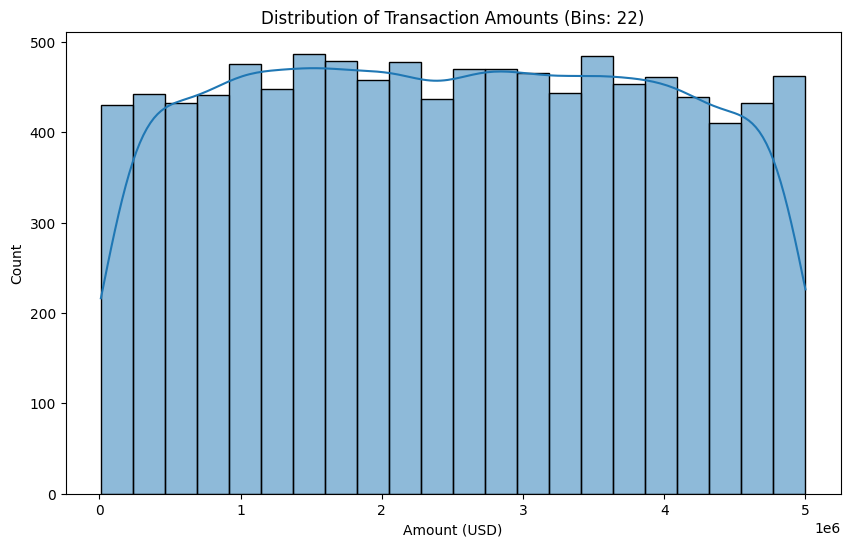

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


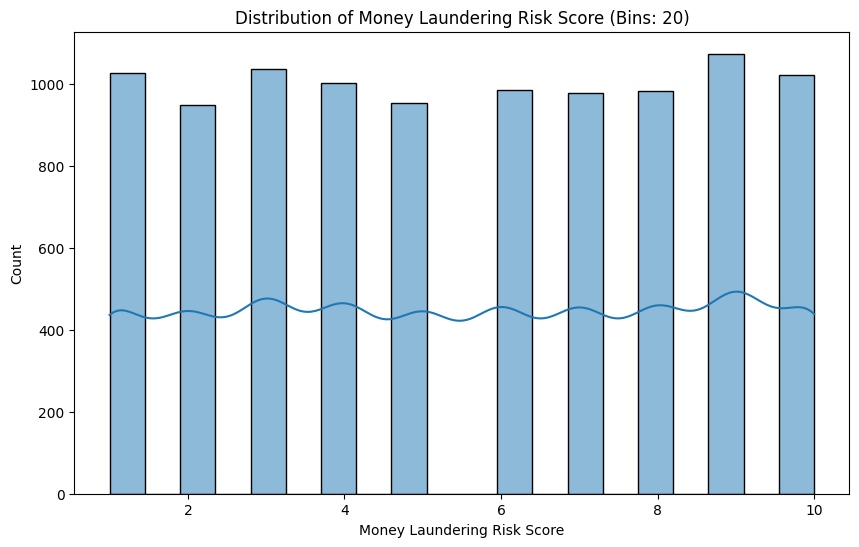

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import ceil, sqrt

def freedman_diaconis(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr / (len(data) ** (1 / 3))
    bins = ceil((data.max() - data.min()) / bin_width)
    return bins

data = blkmon_df['Amount (USD)']
bins_fd = freedman_diaconis(data)
bins_to_use = bins_fd

# Distribution of transaction amounts with dynamic bins
plt.figure(figsize=(10,6))
sns.histplot(data, bins=bins_to_use, kde=True)
plt.title(f'Distribution of Transaction Amounts (Bins: {bins_to_use})')
plt.show()

# Apply the same to Money Laundering Risk Score
data_risk = blkmon_df['Money Laundering Risk Score']
bins_to_use_risk = freedman_diaconis(data_risk)

plt.figure(figsize=(10,6))
sns.histplot(data_risk, bins=bins_to_use_risk, kde=True)
plt.title(f'Distribution of Money Laundering Risk Score (Bins: {bins_to_use_risk})')
plt.show()


The distribution of transaction amounts appears relatively uniform, indicating that there might not be strong patterns in how amounts are distributed. 
The Money Laundering Risk Score shows a somewhat balanced distribution across scores, with no single score dominating. This suggests that transactions are being flagged across a range of risk levels, with no overwhelming bias toward high or low risk.

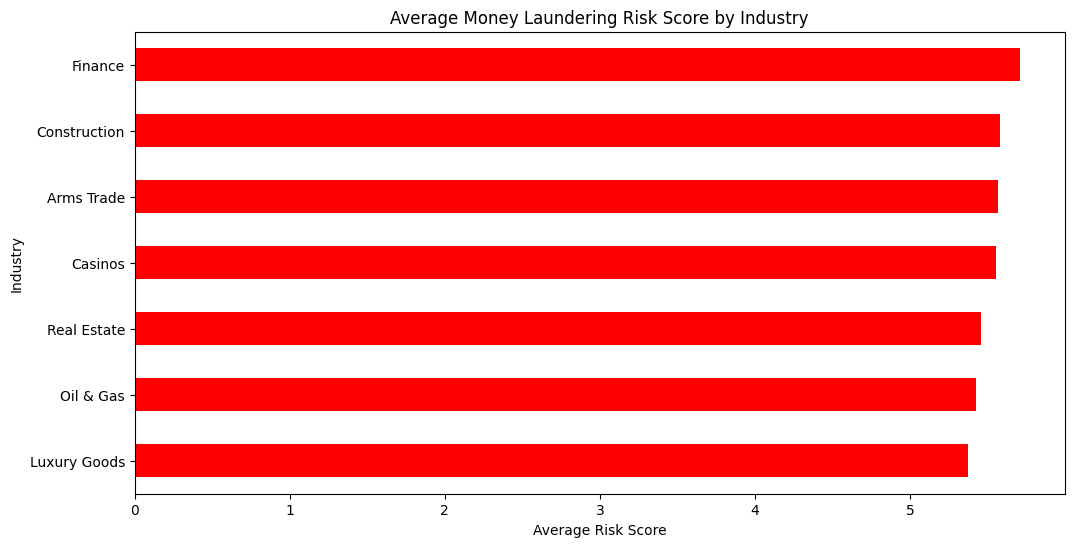

In [11]:
# Group by 'Industry' and calculate the average risk score
industry_risk_score = blkmon_df.groupby('Industry')['Money Laundering Risk Score'].mean().sort_values(ascending=False)

# Plot the industry-wise average risk score
plt.figure(figsize=(12,6))
industry_risk_score.plot(kind='barh', color='red')
plt.title('Average Money Laundering Risk Score by Industry')
plt.xlabel('Average Risk Score')
plt.ylabel('Industry')
plt.gca().invert_yaxis()
plt.show()


# Correlation Analysis

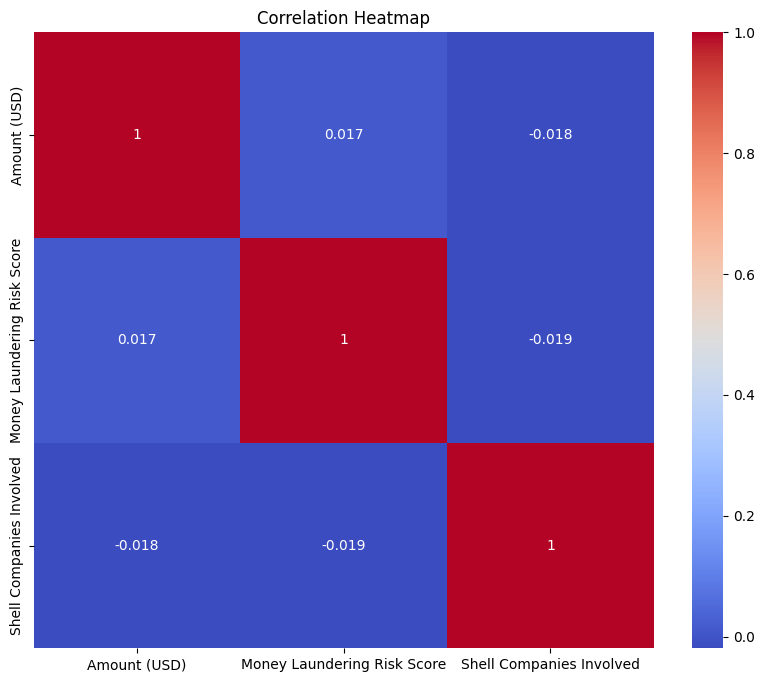

In [12]:
numeric_df = blkmon_df.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


* There is very little correlation between Amount and other features like Money Laundering Risk Score (correlation = 0.017) or Shell Companies Involved (correlation = -0.018). This suggests that the transaction amount alone may not be a strong predictor of risk or the involvement of shell companies.
* The slight negative correlation between Shell Companies Involved and Amount (-0.018), as well as with Money Laundering Risk Score (-0.019), suggests that higher shell company involvement does not necessarily imply larger transaction amounts or higher risk scores. However, these correlations are very close to zero, indicating weak relationships.

# Categorical columns analysis

In [13]:
#categorical columns analysis
categorical_df = blkmon_df.select_dtypes(include=['object', 'category'])
print(categorical_df.columns)

Index(['Transaction ID', 'Country', 'Transaction Type', 'Date of Transaction',
       'Person Involved', 'Industry', 'Destination Country', 'Source of Money',
       'Financial Institution', 'Tax Haven Country'],
      dtype='object')


In [14]:
categorical_columns = ['Country', 'Transaction Type', 'Industry', 'Destination Country', 'Source of Money', 'Financial Institution', 'Tax Haven Country']

for col in categorical_columns:
    print(f"Column: {col}")
    print(blkmon_df[col].value_counts())
    print("\n")


Column: Country
Country
China           1038
South Africa    1026
UK              1014
Brazil          1006
Russia           997
Singapore        995
India            990
Switzerland      985
UAE              976
USA              973
Name: count, dtype: int64


Column: Transaction Type
Transaction Type
Property Purchase    2086
Stocks Transfer      1983
Offshore Transfer    1980
Cash Withdrawal      1978
Cryptocurrency       1973
Name: count, dtype: int64


Column: Industry
Industry
Finance         1475
Construction    1460
Luxury Goods    1459
Real Estate     1443
Arms Trade      1414
Casinos         1377
Oil & Gas       1372
Name: count, dtype: int64


Column: Destination Country
Destination Country
USA             1061
Russia          1035
India           1032
Singapore        999
South Africa     989
Switzerland      987
China            986
UK               981
UAE              970
Brazil           960
Name: count, dtype: int64


Column: Source of Money
Source of Money
Illegal    

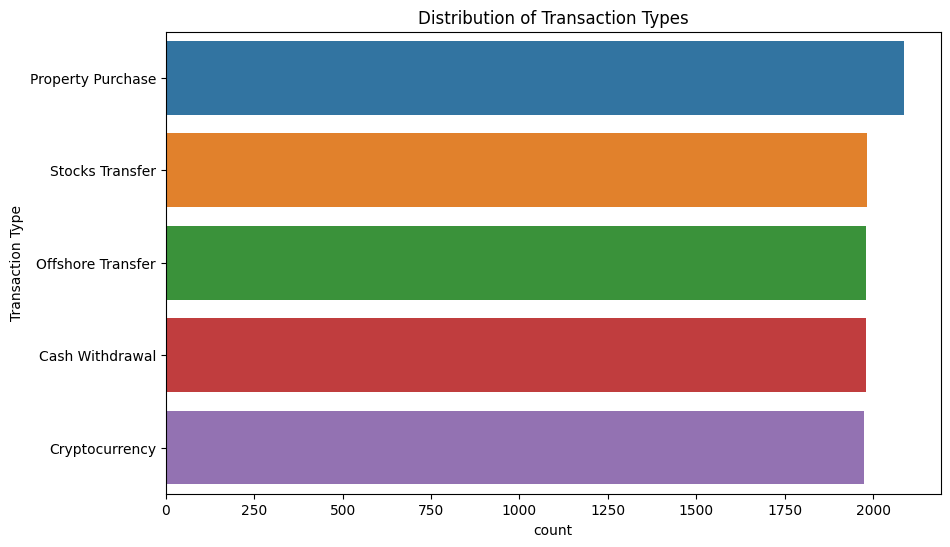

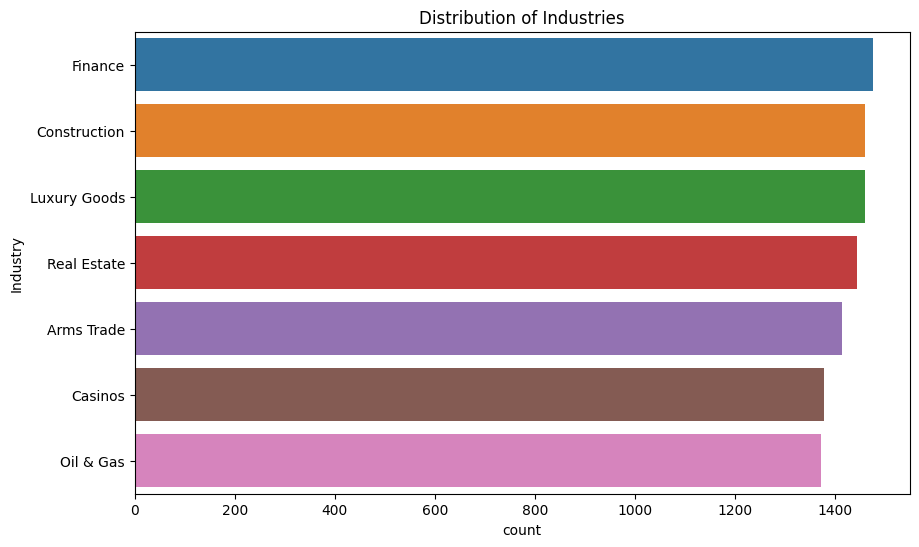

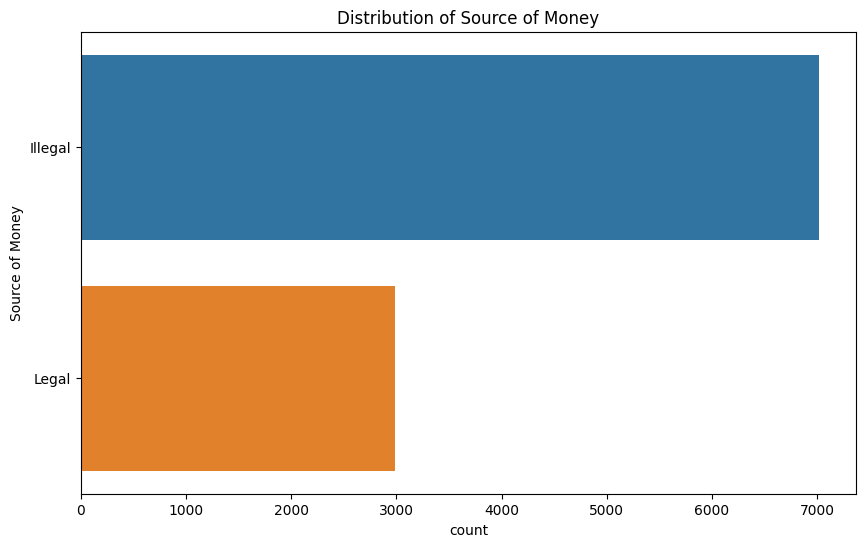

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of Transaction Type
plt.figure(figsize=(10,6))
sns.countplot(data=blkmon_df, y='Transaction Type', order=blkmon_df['Transaction Type'].value_counts().index)
plt.title('Distribution of Transaction Types')
plt.show()

# Visualize the distribution of Industry
plt.figure(figsize=(10,6))
sns.countplot(data=blkmon_df, y='Industry', order=blkmon_df['Industry'].value_counts().index)
plt.title('Distribution of Industries')
plt.show()

# Visualize the distribution of Source of Money
plt.figure(figsize=(10,6))
sns.countplot(data=blkmon_df, y='Source of Money', order=blkmon_df['Source of Money'].value_counts().index)
plt.title('Distribution of Source of Money')
plt.show()


# Countries and Amount transactions 

In [16]:
import plotly.graph_objects as go
import pandas as pd

# Sample simplified dataset with 'Country' and 'Destination Country'
sankey_data = blkmon_df.groupby(['Country', 'Destination Country'])['Amount (USD)'].sum().reset_index()

# Combine both 'Country' and 'Destination Country' into one list of unique countries
all_countries = pd.concat([sankey_data['Country'], sankey_data['Destination Country']]).unique().tolist()

# Map countries to their indices in the combined list
sankey_data['source'] = sankey_data['Country'].apply(lambda x: all_countries.index(x))
sankey_data['target'] = sankey_data['Destination Country'].apply(lambda x: all_countries.index(x))

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=10,
        line=dict(color="black", width=0.5),
        label=all_countries,  # List of countries
        color="blue"
    ),
    link=dict(
        source=sankey_data['source'],  # Source index
        target=sankey_data['target'],  # Target index
        value=sankey_data['Amount (USD)'],  # Transaction amounts
        color="lightblue" 
    )
))

# Update layout for better visualization
fig.update_layout(
    title_text="Money Flow Between Countries",
    font_size=10,
    width=1800,
    height=700
)

# Show the diagram
fig.show()


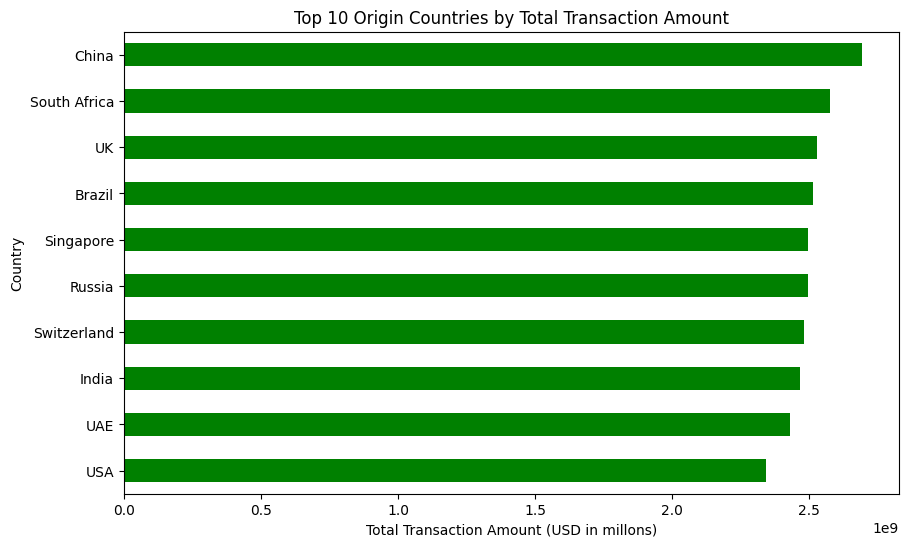

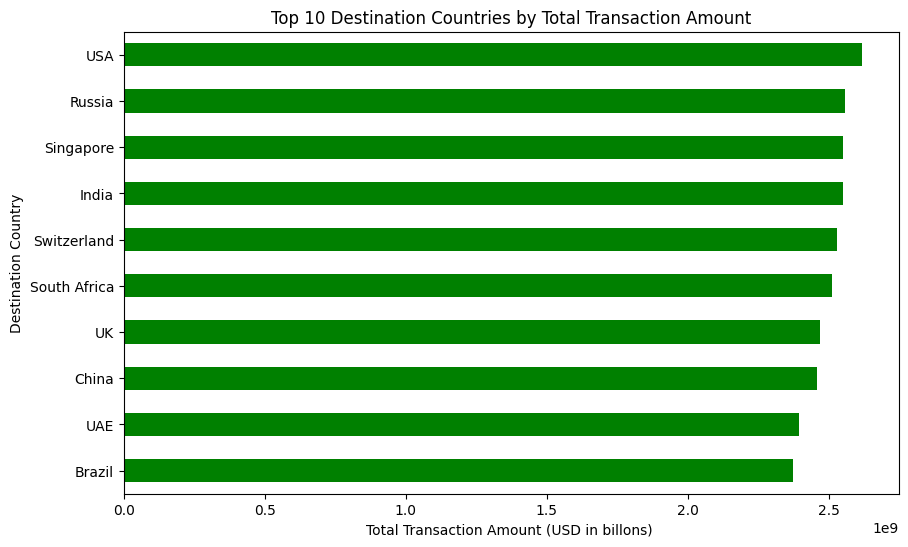

In [17]:
# Group by 'Country' and calculate total transaction amount
top_origin_countries = blkmon_df.groupby('Country')['Amount (USD)'].sum().sort_values(ascending=False).head(10)

# Plot the top origin countries
plt.figure(figsize=(10,6))
top_origin_countries.plot(kind='barh', color='green')
plt.title('Top 10 Origin Countries by Total Transaction Amount')
plt.xlabel('Total Transaction Amount (USD in millons)')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest at the top
plt.show()

top_dest_countries = blkmon_df.groupby('Destination Country')['Amount (USD)'].sum().sort_values(ascending=False).head(10)

# Plot the top destination countries
plt.figure(figsize=(10,6))
top_dest_countries.plot(kind='barh', color='green')
plt.title('Top 10 Destination Countries by Total Transaction Amount')
plt.xlabel('Total Transaction Amount (USD in billons) ')
plt.ylabel('Destination Country')
plt.gca().invert_yaxis()
plt.show()


1. Distribution of Transaction Types:
This graph shows the frequency of different transaction types across the dataset. The most common transaction type is Property Purchase, followed closely by Stocks Transfer and Offshore Transfer. These transaction types could indicate the nature of financial activities in illicit transactions, with Property Purchases potentially serving as methods to launder large amounts of money.

2. Distribution of Industries:
This graph displays the distribution of transactions across various industries. Finance appears to be the industry most associated with the transactions, followed by Construction, Luxury Goods, and Real Estate. Given the context of financial irregularities, industries like Finance and Real Estate often serve as conduits for laundering money through complex financial instruments or property investments.

3. Distribution of Source of Money:
This plot highlights the proportions of transactions classified as Legal or Illegal. Illegal transactions dominate the dataset, suggesting a significant volume of transactions associated with potentially illicit activities. Understanding the breakdown between legal and illegal sources is crucial for identifying patterns and assessing the risk of money laundering.

# Money Laundering Risk Score analysis 

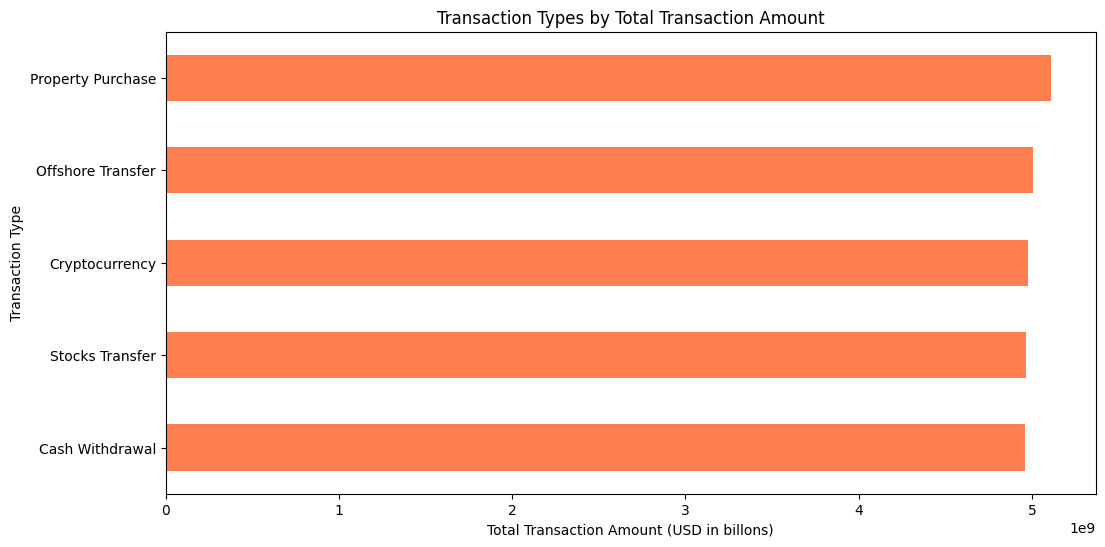

In [18]:
# Group by 'Transaction Type' and calculate total transaction amount
transaction_type_amount = blkmon_df.groupby('Transaction Type')['Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
transaction_type_amount.plot(kind='barh', color='coral')
plt.title('Transaction Types by Total Transaction Amount')
plt.xlabel('Total Transaction Amount (USD in billons)')
plt.ylabel('Transaction Type')
plt.gca().invert_yaxis()
plt.show()


This bar chart displays the total transaction amount for each transaction type in billions of USD. Property Purchase leads the transaction types in terms of total volume, followed closely by Offshore Transfers and Cryptocurrency. These types of transactions are often used to move large sums of money, possibly with the intent to obscure the source and destination of the funds. This may highlight potential areas for financial scrutiny, especially when associated with high-risk activities.

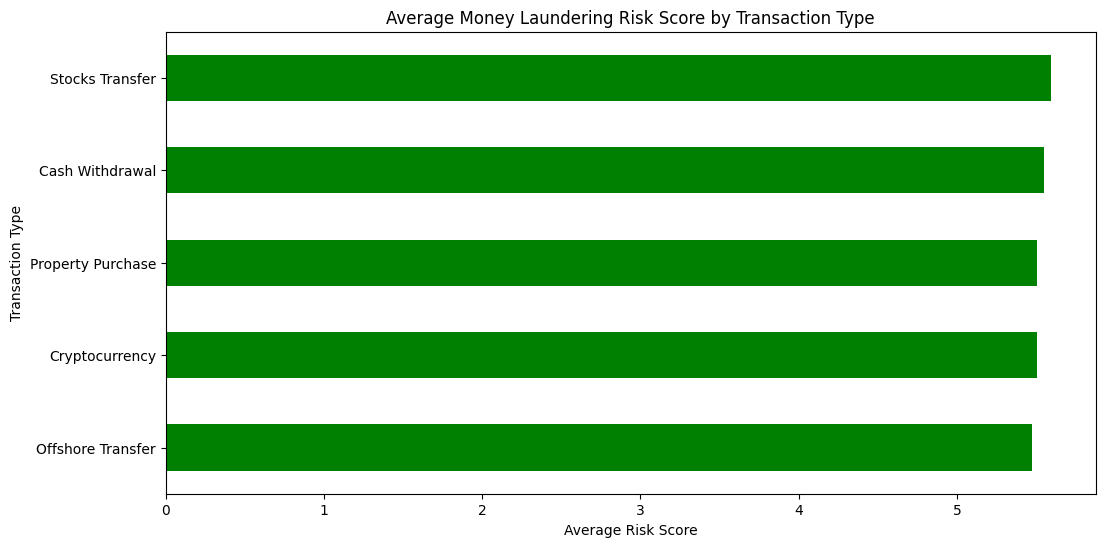

In [19]:
# Group by 'Transaction Type' and calculate the average risk score
transaction_type_risk_score = blkmon_df.groupby('Transaction Type')['Money Laundering Risk Score'].mean().sort_values(ascending=False)

# Plot the transaction type-wise average risk score
plt.figure(figsize=(12,6))
transaction_type_risk_score.plot(kind='barh', color='green')
plt.title('Average Money Laundering Risk Score by Transaction Type')
plt.xlabel('Average Risk Score')
plt.ylabel('Transaction Type')
plt.gca().invert_yaxis()
plt.show()


This plot shows the average Money Laundering Risk Score for each transaction type. Stocks Transfers and Cash Withdrawals exhibit the highest average risk scores, indicating that transactions of these types may be more prone to money laundering activities. It's noteworthy that Offshore Transfers and Cryptocurrency also have relatively high risk scores, pointing to the potential for illegal activities through these channels. Monitoring these types of transactions can help in identifying and mitigating money laundering risks.

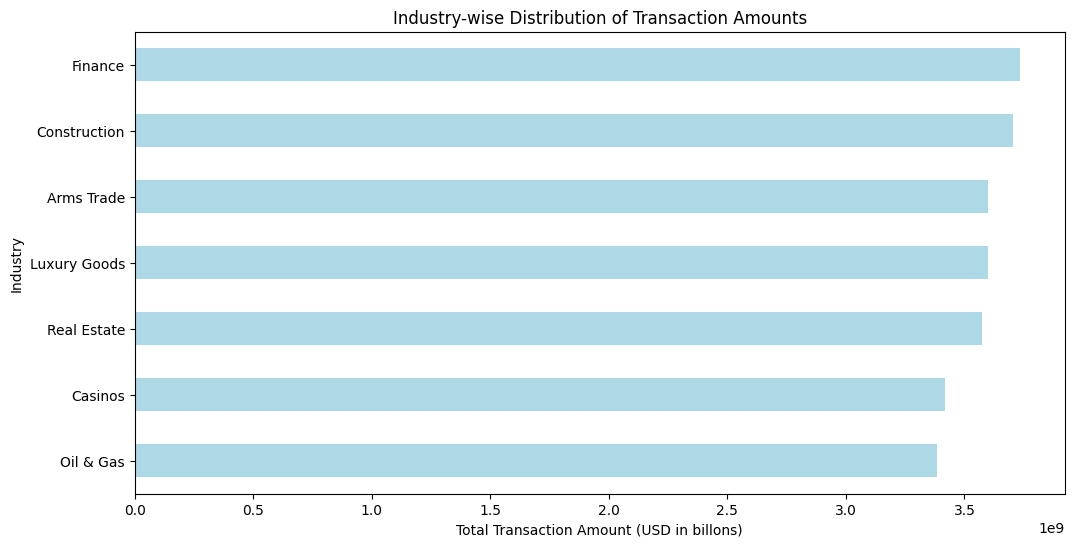

In [20]:
# Group by 'Industry' and calculate total transaction amount
industry_transaction_amount = blkmon_df.groupby('Industry')['Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
industry_transaction_amount.plot(kind='barh', color='lightblue')
plt.title('Industry-wise Distribution of Transaction Amounts')
plt.xlabel('Total Transaction Amount (USD in billons)')
plt.ylabel('Industry')
plt.gca().invert_yaxis()
plt.show()


This bar chart illustrates the total transaction amounts across different industries in billions of USD. Finance and Construction industries lead with the highest transaction volumes, followed closely by Arms Trade, Luxury Goods, and Real Estate. These industries often handle large sums of money, which can create opportunities for hiding illicit activities. The distribution helps identify which industries are most involved in high-value transactions, potentially serving as key areas for financial investigation.

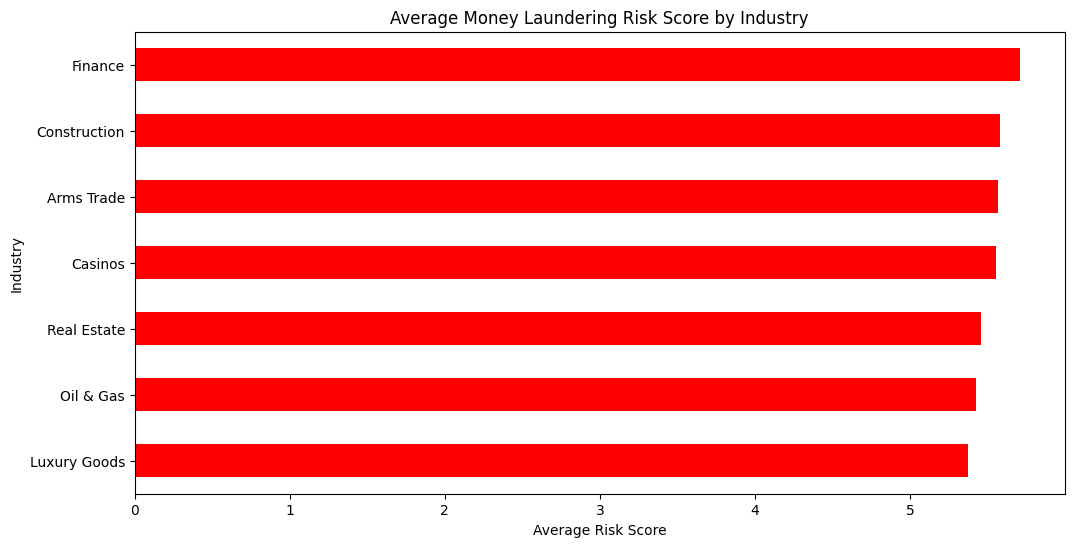

In [21]:
# Group by 'Industry' and calculate the average risk score
industry_risk_score = blkmon_df.groupby('Industry')['Money Laundering Risk Score'].mean().sort_values(ascending=False)

# Plot the industry-wise average risk score
plt.figure(figsize=(12,6))
industry_risk_score.plot(kind='barh', color='red')
plt.title('Average Money Laundering Risk Score by Industry')
plt.xlabel('Average Risk Score')
plt.ylabel('Industry')
plt.gca().invert_yaxis()
plt.show()


This bar chart showcases the average money laundering risk score across different industries. Industries like Luxury Goods, Oil & Gas, and Arms Trade are associated with higher average risk scores, indicating that transactions within these sectors may involve higher financial risks related to money laundering. On the other hand, industries such as Finance and Construction exhibit relatively lower average risk scores. This analysis helps identify industries that are more prone to money laundering activities and therefore require stricter financial scrutiny.

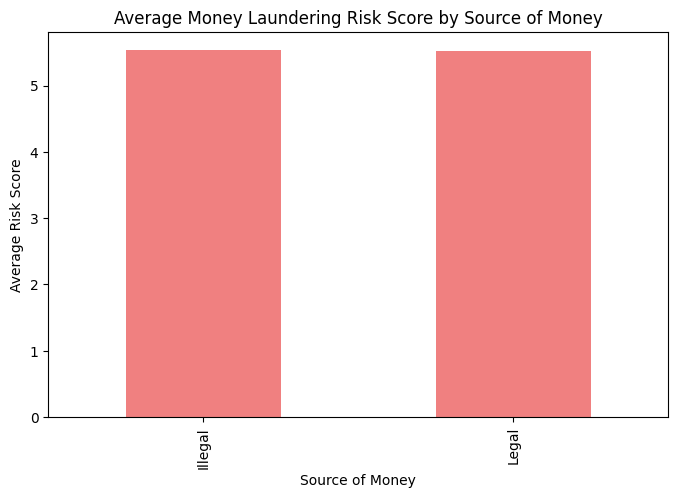

In [22]:
# Group by 'Source of Money' and calculate the average risk score
source_risk_score = blkmon_df.groupby('Source of Money')['Money Laundering Risk Score'].mean()

# Plot the source of money vs risk score
plt.figure(figsize=(8,5))
source_risk_score.plot(kind='bar', color='lightcoral')
plt.title('Average Money Laundering Risk Score by Source of Money')
plt.xlabel('Source of Money')
plt.ylabel('Average Risk Score')
plt.show()


This bar chart compares the average money laundering risk score between legal and illegal sources of money. Both legal and illegal sources appear to have a similar average risk score, which suggests that even legal transactions may carry some risk of being involved in money laundering activities. This observation might indicate that legal sources still undergo scrutiny and are not immune to risk, making it crucial to monitor both categories.

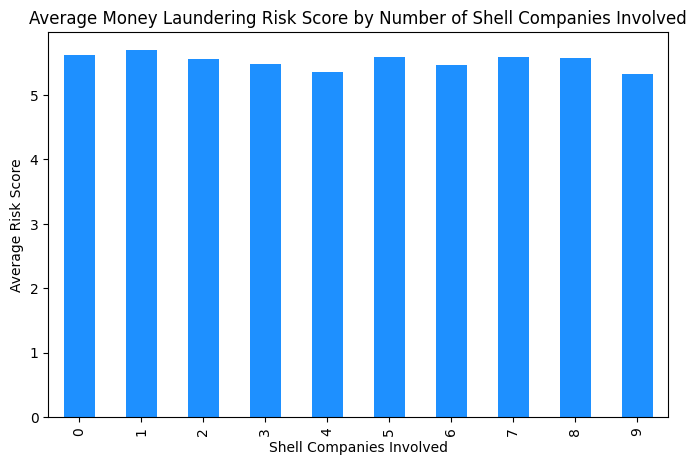

In [23]:
# Group by 'Shell Companies Involved' and calculate the average risk score
shell_companies_risk = blkmon_df.groupby('Shell Companies Involved')['Money Laundering Risk Score'].mean()

# Plot shell companies involved vs risk score
plt.figure(figsize=(8,5))
shell_companies_risk.plot(kind='bar', color='dodgerblue')
plt.title('Average Money Laundering Risk Score by Number of Shell Companies Involved')
plt.xlabel('Shell Companies Involved')
plt.ylabel('Average Risk Score')
plt.show()


This bar chart highlights the relationship between the number of shell companies involved in a transaction and the associated money laundering risk score. Interestingly, the average risk score remains consistently high, regardless of the number of shell companies involved, with no substantial variation. This suggests that, regardless of the complexity (i.e., the number of shell companies), transactions are typically viewed as high risk, possibly because the involvement of shell companies inherently raises suspicion, even when only a few are involved.



# Feature Engineering


Datetime Features

In [24]:
# Convert the 'Date of Transaction' column to datetime format
blkmon_df['Date of Transaction'] = pd.to_datetime(blkmon_df['Date of Transaction'])
# Extract day, month, hour features
blkmon_df['Transaction_Day'] = blkmon_df['Date of Transaction'].dt.day
blkmon_df['Transaction_Month'] = blkmon_df['Date of Transaction'].dt.month
blkmon_df['Transaction_Hour'] = blkmon_df['Date of Transaction'].dt.hour

blkmon_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               10000 non-null  object        
 1   Country                      10000 non-null  object        
 2   Amount (USD)                 10000 non-null  float64       
 3   Transaction Type             10000 non-null  object        
 4   Date of Transaction          10000 non-null  datetime64[ns]
 5   Person Involved              10000 non-null  object        
 6   Industry                     10000 non-null  object        
 7   Destination Country          10000 non-null  object        
 8   Reported by Authority        10000 non-null  bool          
 9   Source of Money              10000 non-null  object        
 10  Money Laundering Risk Score  10000 non-null  int64         
 11  Shell Companies Involved     10000 non-nul

In [25]:
import pandas as pd
import numpy as np

# Combine 'Date of Transaction' and 'Transaction_Hour' into a single datetime object
blkmon_df['Full_Transaction_Time'] = blkmon_df['Date of Transaction'] + pd.to_timedelta(blkmon_df['Transaction_Hour'], unit='h')

# Sort the dataframe by 'Person Involved' and 'Full_Transaction_Time' to ensure transactions are in order
blkmon_df.sort_values(by=['Person Involved', 'Full_Transaction_Time'], inplace=True)

# Calculate the time gaps between successive transactions in hours
blkmon_df['Time Gap (hours)'] = blkmon_df.groupby('Person Involved')['Full_Transaction_Time'].diff().dt.total_seconds() / 3600

#The NaN values are appearing in the Time Gap (hours) column for the 
#first transaction of each person because there is no previous transaction to calculate the time difference from. 
blkmon_df['Time Gap (hours)'].fillna(0, inplace=True)

blkmon_df



/tmp/ipykernel_17/3707803882.py:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction_Day,Transaction_Month,Transaction_Hour,Full_Transaction_Time,Time Gap (hours)
226,TX0000000227,Singapore,3.746944e+06,Offshore Transfer,2013-01-10 10:00:00,Person_1,Real Estate,USA,False,Legal,9,5,Bank_200,Luxembourg,10,1,10,2013-01-10 20:00:00,0.0
5283,TX0000005284,UAE,2.200251e+06,Cryptocurrency,2013-08-09 03:00:00,Person_10,Real Estate,India,False,Legal,9,0,Bank_77,Switzerland,9,8,3,2013-08-09 06:00:00,0.0
9971,TX0000009972,India,3.217272e+06,Property Purchase,2014-02-20 11:00:00,Person_100,Finance,UAE,False,Illegal,1,5,Bank_264,Switzerland,20,2,11,2014-02-20 22:00:00,0.0
5281,TX0000005282,USA,5.342882e+05,Cash Withdrawal,2013-08-09 01:00:00,Person_1000,Oil & Gas,UK,False,Illegal,5,9,Bank_349,Panama,9,8,1,2013-08-09 02:00:00,0.0
5550,TX0000005551,Singapore,2.169575e+06,Stocks Transfer,2013-08-20 06:00:00,Person_1002,Luxury Goods,USA,False,Illegal,6,7,Bank_440,Cayman Islands,20,8,6,2013-08-20 12:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,TX0000004014,Singapore,2.600608e+06,Cash Withdrawal,2013-06-17 05:00:00,Person_9995,Luxury Goods,China,False,Illegal,8,0,Bank_29,Singapore,17,6,5,2013-06-17 10:00:00,2604.0
9983,TX0000009984,USA,4.105025e+06,Cryptocurrency,2014-02-20 23:00:00,Person_9995,Construction,Brazil,True,Legal,5,5,Bank_284,Bahamas,20,2,23,2014-02-21 22:00:00,5988.0
2997,TX0000002998,Switzerland,2.727573e+06,Offshore Transfer,2013-05-05 21:00:00,Person_9998,Luxury Goods,China,False,Illegal,2,3,Bank_254,Singapore,5,5,21,2013-05-06 18:00:00,0.0
4672,TX0000004673,UK,9.596637e+05,Stocks Transfer,2013-07-14 16:00:00,Person_9998,Casinos,UK,True,Illegal,2,7,Bank_450,Luxembourg,14,7,16,2013-07-15 08:00:00,1670.0


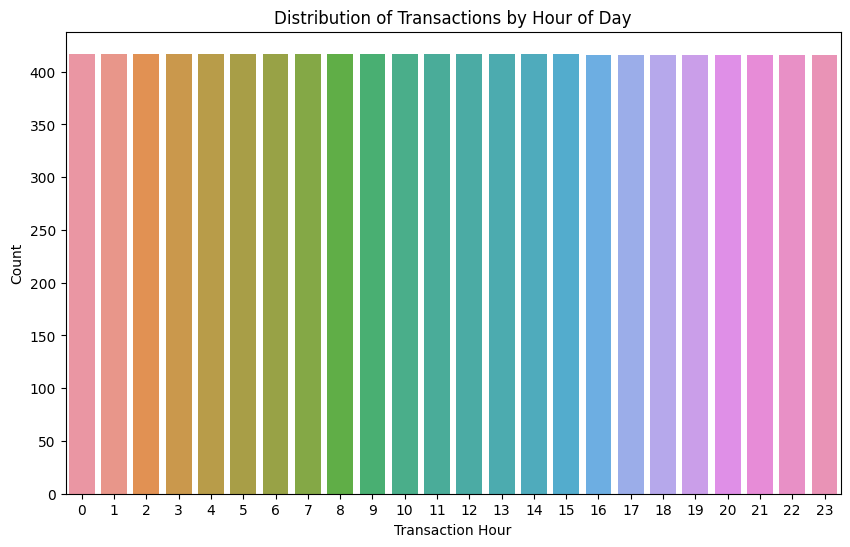

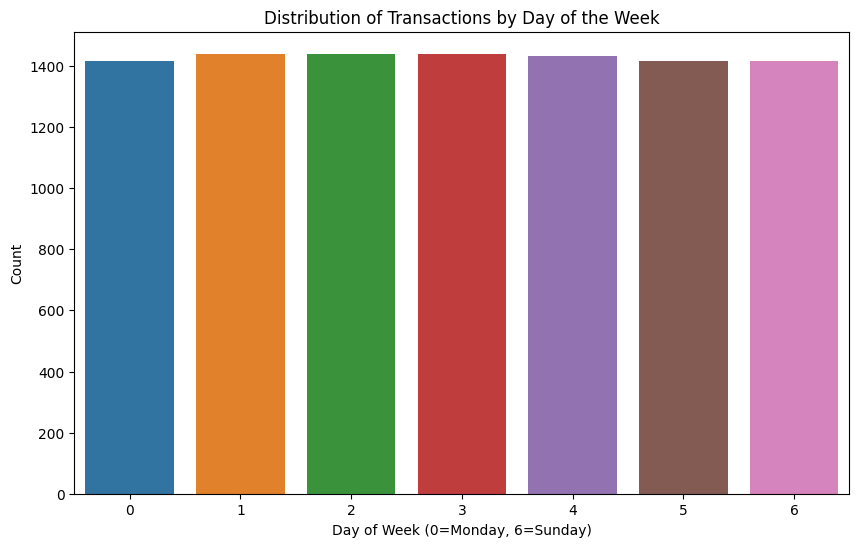

In [26]:
# Visualize the Transaction Hour Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=blkmon_df, x='Transaction_Hour')
plt.title('Distribution of Transactions by Hour of Day')
plt.xlabel('Transaction Hour')
plt.ylabel('Count')
plt.show()

# Visualize the Day of Week Distribution
plt.figure(figsize=(10,6))
# Extract day of the week
blkmon_df['Day of Week'] = blkmon_df['Date of Transaction'].dt.dayofweek  # 0 = Monday, 6 = Sunday
sns.countplot(data=blkmon_df, x='Day of Week')
plt.title('Distribution of Transactions by Day of the Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Count')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



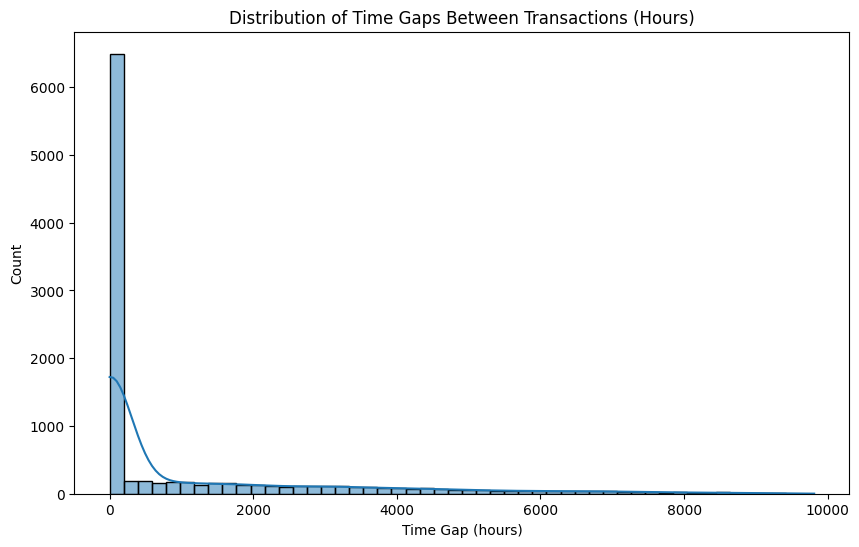

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(blkmon_df['Time Gap (hours)'], bins=50, kde=True)
plt.title('Distribution of Time Gaps Between Transactions (Hours)')
plt.xlabel('Time Gap (hours)')
plt.ylabel('Count')
plt.show()

This is a highly skewed distribution of time gaps between transactions, with most transactions happening in quick succession (small time gaps). The long tail indicates that there are a few transactions with significantly larger time gaps.

Hypotheses testing:
* Null Hypothesis (H0): The distribution of transactions across the hours of the day (or days of the week) is uniform.
* Alternative Hypothesis (H1): The distribution of transactions across the hours of the day (or days of the week) is not uniform.

In [28]:
from scipy.stats import chisquare

# Get observed frequencies for transaction hours
observed_hour = blkmon_df['Transaction_Hour'].value_counts().sort_index()

# Expected frequencies for uniform distribution
expected_hour = [len(blkmon_df) / 24] * 24  # Since we expect equal frequencies across 24 hours

# Perform Chi-Square Goodness of Fit Test
chi2_hour, p_value_hour = chisquare(f_obs=observed_hour, f_exp=expected_hour)

print(f"Chi-Square Statistic for Transaction Hours: {chi2_hour}")
print(f"P-value for Transaction Hours: {p_value_hour}")


Chi-Square Statistic for Transaction Hours: 0.012799999999999999
P-value for Transaction Hours: 1.0


In [29]:

observed_day = blkmon_df['Day of Week'].value_counts().sort_index()
expected_day = [len(blkmon_df) / 7] * 7  # Since we expect equal frequencies across 7 days
chi2_day, p_value_day = chisquare(f_obs=observed_day, f_exp=expected_day)
print(f"Chi-Square Statistic for Days of the Week: {chi2_day}")
print(f"P-value for Days of the Week: {p_value_day}")


Chi-Square Statistic for Days of the Week: 0.6144000000000001
P-value for Days of the Week: 0.9961555648709094


* Transaction Hours: The p-value is 1.0, which indicates there is no significant difference between the observed and expected transaction frequencies across different hours of the day. This means transactions are uniformly distributed across the day.
* Days of the Week: The p-value is 0.996, indicating there is no significant difference between the observed and expected transaction frequencies across the days of the week. Transactions are evenly spread out during the week.
* The hypothesis that certain hours or days would show more frequent transactions related to illegal activity failed. There is no evidence to suggest that transactions are more frequent during specific hours or days. **Hence accepting H1 hypothesis**. 

Industry-Based Features

**Hypothesis: Certain industries might be more susceptible to illegal activities.**

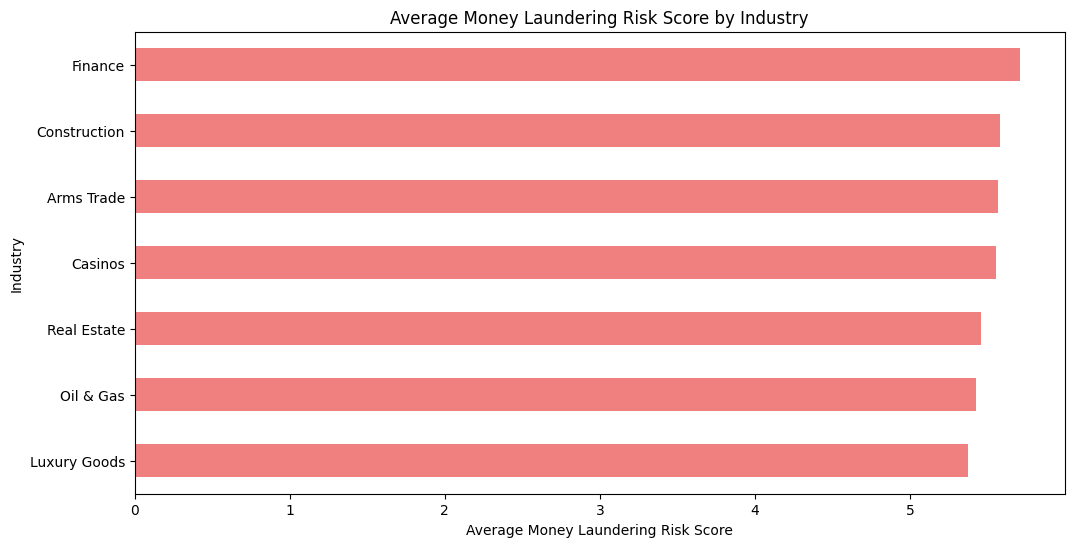

Industry
Finance         5.711864
Construction    5.583562
Arms Trade      5.570721
Casinos         5.556282
Real Estate     5.455301
Oil & Gas       5.427843
Luxury Goods    5.373544
Name: Money Laundering Risk Score, dtype: float64


In [30]:
industry_risk_analysis = blkmon_df.groupby('Industry')['Money Laundering Risk Score'].mean().sort_values(ascending=False)

# Step 2: Plot the average risk score for each industry
plt.figure(figsize=(12,6))
industry_risk_analysis.plot(kind='barh', color='lightcoral')
plt.title('Average Money Laundering Risk Score by Industry')
plt.xlabel('Average Money Laundering Risk Score')
plt.ylabel('Industry')
plt.gca().invert_yaxis()
plt.show()
print(industry_risk_analysis)

This analysis suggests that industries such as Finance, Construction, Arms Trade, and Casinos tend to have higher risk scores for money laundering. This fits the hypothesis that these sectors are more susceptible to illegal financial activity, as they often involve large sums of money and complex financial transactions.

# Model Devoplement 

In [31]:
blkmon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 226 to 8729
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               10000 non-null  object        
 1   Country                      10000 non-null  object        
 2   Amount (USD)                 10000 non-null  float64       
 3   Transaction Type             10000 non-null  object        
 4   Date of Transaction          10000 non-null  datetime64[ns]
 5   Person Involved              10000 non-null  object        
 6   Industry                     10000 non-null  object        
 7   Destination Country          10000 non-null  object        
 8   Reported by Authority        10000 non-null  bool          
 9   Source of Money              10000 non-null  object        
 10  Money Laundering Risk Score  10000 non-null  int64         
 11  Shell Companies Involved     10000 non-null  

In [32]:
blkmon_df.to_csv('Black_money_viz.csv')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_model = blkmon_df.drop(['Transaction ID', 'Person Involved', 'Full_Transaction_Time'], axis=1)

# Define categorical and numerical columns
categorical_cols = ['Country', 'Transaction Type', 'Industry', 'Destination Country', 
                    'Source of Money', 'Financial Institution', 'Tax Haven Country']
numerical_cols = ['Amount (USD)', 'Transaction_Day', 'Transaction_Month', 'Transaction_Hour', 
                  'Time Gap (hours)', 'Shell Companies Involved']

# Split the data into features (X) and target (y)
X = df_model.drop('Money Laundering Risk Score', axis=1)
y = df_model['Money Laundering Risk Score']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_train.head()

,Country,Amount (USD),Transaction Type,Date of Transaction,Industry,Destination Country,Reported by Authority,Source of Money,Shell Companies Involved,Financial Institution,Tax Haven Country,Transaction_Day,Transaction_Month,Transaction_Hour,Time Gap (hours),Day of Week
2043,Singapore,1.047559e+06,Property Purchase,2013-03-27 03:00:00,Finance,Brazil,True,Legal,1,Bank_331,Luxembourg,27,3,3,0.0,2
6078,Brazil,3.494329e+06,Offshore Transfer,2013-09-11 06:00:00,Casinos,UK,False,Illegal,4,Bank_431,Cayman Islands,11,9,6,3556.0,2
7044,India,2.770698e+06,Cash Withdrawal,2013-10-21 12:00:00,Oil & Gas,Singapore,False,Illegal,8,Bank_101,Panama,21,10,12,3662.0,0
9530,UAE,8.874446e+04,Offshore Transfer,2014-02-02 02:00:00,Oil & Gas,Singapore,False,Legal,4,Bank_404,Bahamas,2,2,2,0.0,6
6073,Brazil,2.844631e+06,Offshore Transfer,2013-09-11 01:00:00,Oil & Gas,China,False,Illegal,5,Bank_78,Switzerland,11,9,1,658.0,2


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import joblib

# Define models to test
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# Define parameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20, None],
        'model__min_samples_split': [2, 5]
    },
    'GradientBoosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5]
    },
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5]
    }
}

# Perform GridSearch for each model
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Store best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Predictions and evaluation
    y_pred = grid_search.predict(X_test)
    
    # Calculate performance metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")
    print(f"MAE: {mae}\n")


Training LinearRegression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters for LinearRegression: {}
RMSE: 3.0095371821404764
R-squared: -0.08853161553272004
MAE: 2.5642708158398437

Training RandomForest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for RandomForest: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 200}
RMSE: 2.8929476783389796
R-squared: -0.005825817510964226
MAE: 2.505997020790188

Training GradientBoosting...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for GradientBoosting: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}
RMSE: 2.898697440257184
R-squared: -0.009827968097526174
MAE: 2.5106707077614554

Training XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for XGBoost: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}
RMSE: 2.8973833127273

Several models were tested, including Linear Regression, Random Forest, Gradient Boosting, and XGBoost. Performance was evaluated using RMSE, R-squared, and MAE.
* Random Forest showed the best performance with an RMSE of 2.8929 and MAE of 2.5060, making it the most suitable for predicting money laundering risk scores.
* Gradient Boosting and XGBoost had similar results, but with slightly higher errors than Random Forest.
* Linear Regression performed the worst with the highest RMSE and lowest R-squared.

Random Forest is recommended for further use due to its superior performance in this task.

In [35]:
# Find the model with the best RMSE
best_model_name = min(best_models, key=lambda name: mean_squared_error(y_test, best_models[name].predict(X_test), squared=False))

print(f"The best model is: {best_model_name}")


The best model is: RandomForest


In [36]:
rf_model=best_models[best_model_name]
joblib.dump(rf_model, f'best_model_{best_model_name}.pkl')

['best_model_RandomForest.pkl']